# Project Report:Global Trends in Fossil CO2 Emissions and Air Travel Emission Intensities

## Main Question:

How have global fossil CO2 emissions evolved from 1991 to 2016?
What are the trends in air travel emission intensities between 2019 to 2022 period?

### Introduction

In our project, we delve into the exploration of two key datasets that shed light on critical environmental and economic aspects: the Emissions Database for Global Atmospheric Research (EDGAR) and the Urban Data Platform (UDP) Air Travel Emission Intensity dataset. These datasets, provided by the Joint Research Centre, offer comprehensive insights into the dynamics of fossil CO2 emissions and air travel emission intensities, spanning the years from 1970 to 2016.

The EDGAR dataset provides a detailed view of global atmospheric emissions, including fossil CO2 and greenhouse gases, enabling us to examine the evolving patterns of environmental impact over several decades. Meanwhile, the UDP dataset offers a specific focus on air travel emission intensities, offering valuable perspectives on the environmental consequences of tourism-related activities.

By leveraging these datasets, our project seeks to uncover meaningful correlations between emissions, economic indicators, and tourism activities, providing essential insights for policymakers, researchers, and stakeholders striving for sustainable development and environmental stewardship.

### Data Sources Description:

#### 1. Emissions Database for Global Atmospheric Research (EDGAR)

URL: https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/EDGAR/datasets/v432_FT2016/EDGARv432_FT2016_CO2_per_GDP_emissions_1970-2016.csv

**Reason for Selection:** 
    The EDGAR dataset was chosen due to its comprehensive coverage of global atmospheric emissions, providing detailed insights into fossil CO2 and greenhouse gas emissions over an extended period. This dataset is widely recognized for its reliability and granularity, making it suitable for in-depth analysis of environmental trends.

**Source:** 
    The EDGAR dataset is provided by the Joint Research Centre (JRC), a research arm of the European Commission dedicated to providing scientific research and technological development. The dataset is publicly available through the JRC's Open Data Portal.

**Content:** 
    The dataset contains time-series data on fossil CO2 and greenhouse gas emissions, disaggregated by country and economic sector. It spans the years from 1970 to 2016, offering a comprehensive view of historical emissions trends.

**Data Structure and Quality:**
    The EDGAR dataset is structured in a tabular format, typically in CSV (Comma-Separated Values) files. Each row represents a specific country or region, while columns represent different years and emission metrics. The data is of high quality, with rigorous methodologies employed for emissions estimation. However, there may be some limitations, such as missing data for certain years or regions, which may require careful handling during analysis.

#### 2. Urban Data Platform (UDP) - Air Travel Emission Intensity 

URL: https://urban.jrc.ec.europa.eu/api/udp/v2/en/data/?databrick_id=739&nutslevel=0&ts=TOURISM&nutsversion=-1&mpx=1&nutslevel=9&format=csv

**Reason for Selection:**
    The UDP dataset was selected for its focus on air travel emission intensities, providing valuable insights into the environmental impact of aviation activities, particularly in the context of tourism. This dataset complements the EDGAR dataset by offering a specific perspective on emissions from air travel, allowing for a comprehensive analysis of transportation-related emissions.

**Source:** 
    Similar to the EDGAR dataset, the UDP dataset is also provided by the Joint Research Centre (JRC) and is accessible through their Urban Data Platform.

**Content:** 
    The UDP dataset includes information on the intensity of emissions from air travel, with a focus on tourism-related activities. It covers a range of metrics related to air travel emissions, allowing for detailed analysis of trends and patterns.

**Data Structure and Quality:**
    The UDP dataset is structured in a similar tabular format to the EDGAR dataset, typically in CSV files. Each row represents a specific observation (e.g., country-year), while columns contain different variables and emission metrics. The data quality is generally high, but similar to the EDGAR dataset, there may be limitations such as missing data or inconsistencies across regions.

#### High-Level Data Pipeline Overview:

The data pipeline implemented for this project follows a series of steps to acquire, clean, transform, and store data from two distinct sources: the Emissions Database for Global Atmospheric Research (EDGAR) and the Urban Data Platform (UDP) Air Travel Emission Intensity dataset. Python, along with libraries such as pandas and SQLAlchemy, is used to develop the pipeline.


**Data Pipeline Steps:**

**Data Acquisition:** 
    The get_source_data function retrieves CSV data from the provided URLs using the requests library. 
    Data is then read into pandas DataFrames for further processing.

**Data Loading:**
    The transformed DataFrames are written to an SQLite database using the write_to_target function and SQLAlchemy's create_engine method.

**Data Retrieval:

The pipeline begins by fetching data from the specified sources using the get_source_data function. This function utilizes the requests library to retrieve data from URLs provided as inputs. The data is then read into Pandas DataFrames.

**Data Transformation:

After retrieving the data, various transformation functions are applied to clean and preprocess it. These functions include dropping unnecessary columns, renaming columns, fixing date formats, and transposing the data to a suitable format for analysis. This step ensures that the data is in a standardized format and ready for further processing.

**Data Storage:

Once the data has been transformed, it is written to a target database using the write_to_target function. The pipeline creates a SQLite database using SQLAlchemy, a Python SQL toolkit, to store the processed data. DataFrames are converted to SQL tables and written to the database for later retrieval and analysis.

**Visualization:

Additionally, the pipeline includes code for visualizing the processed data. Matplotlib, a popular plotting library in Python, is used to create bar charts and line plots to visualize emissions data for European countries and global regions over multiple years.

#### Technologies Used:


**Python:** 
    The primary programming language used for implementing the data pipeline due to its versatility and extensive library ecosystem.

**pandas:**
    A powerful library for data manipulation and analysis, utilized for handling tabular data structures and performing data transformations.

**sqlalchemy:** 
    A Python SQL toolkit and Object-Relational Mapping (ORM) library used for database connectivity and interaction.

**requests:** 
    A Python library used for making HTTP requests to fetch data from web endpoints.

**Matplotlib:** 
    Matplotlib is utilized for data visualization, allowing for the creation of various plots and charts to visualize emissions trends.

This data pipeline facilitates the automated extraction, transformation, and loading of data from the specified sources into a structured format in an SQLite database, ensuring that the data is readily available for analysis and visualization.

This high-level overview encapsulates the core functionalities and technologies employed in the data pipeline to streamline the process of data acquisition, transformation, and storage for subsequent analysis and visualization.

In [3]:
import pandas as pd
from sqlalchemy import create_engine, TEXT, FLOAT, BIGINT
import numpy as np
import os
import requests
import io

def drop_columns(df, col_list):
    
    existing_cols = [col for col in col_list if col in df.columns]
    # Dropping the specified columns from the DataFrame
    df.drop(existing_cols, axis=1, inplace=True)

    return df

def rename_columns(df, col_dict):
  
    # Renaming columns of the DataFrame as per the provided dictionary mapping
    df.rename(columns=col_dict, inplace=True)

    return df

def fix_date_format(df, col_list):

    # Iterating over each column in the provided column list
    for col in col_list:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')
        df[col] = df[col].dt.strftime('%Y-%m-%d %H:%M')   
    return df

def transpose_data(df):
    # interchanging rows to column in order to plot graph in a specific format
    if 'YEAR' in df.columns or 'VALUE'  in df.columns:
         col_list = df.columns.values.tolist()
         existing_cols = [col for col in col_list if col in df.columns and col not in ['YEAR', 'VALUE']]
         pivoted_df = df.pivot(index=existing_cols, columns="YEAR", values="VALUE").reset_index()
         return pivoted_df
    else:
        return df


def transform_df_data(df):

    data_col_del = ['1970', '1971', '1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990', 'LEVEL_ID','TERRITORY_ID','DATE']
		
     # Dropping unnecessary columns
    df = drop_columns(df, data_col_del)
    df = transpose_data(df)

    return df

def get_source_data(path, delimiter):
    # Use io.StringIO to simulate a file object
    response = requests.get(path)
    csv_file = io.StringIO(response.text)

# Read the CSV file and filter out lines ending with ",,,,,,,,"
    filtered_lines = [line for line in csv_file if not line.strip().endswith(",,,,,,,")]

# Join the filtered lines into a single string
    filtered_csv_data = "".join(filtered_lines)

# Use pandas to read the filtered CSV data into a DataFrame
    df = pd.read_csv(io.StringIO(filtered_csv_data), delimiter=delimiter)   
    # Using pandas to read data from the specified file path with the given delimiter
    # df = pd.read_csv(path, delimiter=delimiter)
    return df

def write_to_target(df, engine, table_name):
   
    # Writing the DataFrame to the specified SQL table without including the DataFrame's index
    df.to_sql(table_name, engine, if_exists='replace', index=False)


def automated_data_pipeline(details):
    world_df = get_source_data(details['world_data']['source'], details['world_data']['delimiter'])
    europe_df = get_source_data(details['europe_data']['source'], details['europe_data']['delimiter'])

    world_df = transform_df_data(world_df)
    europe_df = transform_df_data(europe_df)

    engine = create_engine(f"sqlite:///{details['target_db_path']}\\{details['target_db_name']}.db")

    write_to_target(world_df, engine, details['world_data']['target_table'])
    write_to_target(europe_df, engine, details['europe_data']['target_table'])

if __name__ == '__main__':
    src_tgt_details = {
        'world_data' : {
            'source' : "https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/EDGAR/datasets/v432_FT2016/EDGARv432_FT2016_CO2_per_GDP_emissions_1970-2016.csv",
            'delimiter' : ',',
            'target_table' : 'world_data'
        },
        'europe_data' : {
            'source' : "https://urban.jrc.ec.europa.eu/api/udp/v2/en/data/?databrick_id=739&nutslevel=0&ts=TOURISM&nutsversion=-1&mpx=1&nutslevel=9&format=csv",
            'delimiter' : ',',
            'target_table' : 'europe_data'
        },
        'target_db_path' : './data',        
        'target_db_name' : 'made-project_new'
    }

    world_df = get_source_data(src_tgt_details['world_data']['source'], src_tgt_details['world_data']['delimiter'])
    europe_df = get_source_data(src_tgt_details['europe_data']['source'], src_tgt_details['europe_data']['delimiter'])
    
  
    world_df = transform_df_data(world_df)
    europe_df = transform_df_data(europe_df)



In [4]:
import matplotlib.pyplot as plt

In [5]:
# rename the transposed columns in order to plot the graphs for the respective years
data_col_rename = {
       2019: 'Year_2019',
       2020: 'Year_2020',
       2021: 'Year_2021',
       2022: 'Year_2022'
     }
europe_df = rename_columns(europe_df, data_col_rename)

The data pipeline described implements several transformation and cleaning steps to prepare the raw data for analysis. Here's a summary of these steps and their rationale:

**Dropping Unnecessary Columns**:
    **Purpose**: Certain columns in the raw datasets may not be relevant to the analysis or visualization tasks at hand. Removing these columns helps streamline the datasets, reducing complexity and improving computational efficiency.
    **Implementation**: The `drop_columns` function selectively removes specified columns from the DataFrame, enhancing clarity and focus.

**Renaming Columns**:
    **Purpose**: Column names in the raw datasets may not always be intuitive or descriptive. Renaming columns using meaningful labels improves readability and facilitates easier interpretation of the data.
    **Implementation**: The `rename_columns` function employs dictionaries to map existing column names to new, more informative labels, enhancing the overall clarity of the datasets.

**Fixing Date Formats**:
    **Purpose**: Date columns in the raw datasets may be stored in inconsistent formats or data types. Standardizing date formats ensures uniformity and compatibility across different datasets, facilitating easier manipulation and analysis.
    **Implementation**: The `fix_date_format` function converts date columns to a consistent format (`'%Y-%m-%d %H:%M'`), simplifying subsequent date-related operations and visualizations.

**Transposing Data**:
   **Purpose**: In certain cases, transposing the data can facilitate better visualization or analysis of specific trends or patterns. For example, converting rows to columns can be useful for creating time-series plots or comparing multiple variables across different categories.
   **Implementation**: The `transpose_data` function pivots the data, interchanging rows and columns as needed based on specific criteria such as years and values, enabling more intuitive visualizations and insights.

**Data Filtering**:
  **Purpose**: Filtering out irrelevant or incomplete data ensures that only high-quality, relevant data is used for analysis and visualization tasks. This helps improve the accuracy and reliability of the results.
  **Implementation**: The pipeline includes filtering steps, such as removing lines ending with specific patterns or filtering out rows with missing values, to ensure that only clean, complete data is processed and analyzed.

Overall, these transformation and cleaning steps are essential for preparing the raw datasets for downstream analysis and visualization. By removing noise, standardizing formats, and enhancing clarity, these steps help uncover meaningful insights and facilitate informed decision-making.

**Problems encountered and how I solved them:**
    The major issue was finding a dataset with the web downloadbale link. Initially I added the dataset to github and used the raw file however had to change the entire dataset and redo the entire datapipeline according to the new dataset.

The pipeline incorporates error handling mechanisms to address potential issues with input data or processing. These include:

**Data Validation**: Before processing, the pipeline validates input data integrity, ensuring it meets expected formats and standards. This helps identify and mitigate errors early in the process.

**Exception Handling**: Exception handling techniques are employed to gracefully handle errors encountered during data retrieval, cleaning, or transformation. This prevents pipeline failures and allows for continued processing with minimal disruption.

**Error Logging**: The pipeline logs errors encountered during execution, providing valuable insights into potential issues. This facilitates troubleshooting and debugging, enabling prompt resolution of errors to maintain pipeline integrity.

**Dynamic Adaptation**: The pipeline is designed to adapt dynamically to changing input data or requirements. This flexibility allows for seamless adjustments to accommodate evolving data structures or processing needs, ensuring robustness and reliability over time.

By incorporating these error-handling strategies, the pipeline maintains resilience in the face of uncertainties or fluctuations in input data, ensuring consistent and reliable performance.

YEAR      NAME_HTML  Year_2019  Year_2020  Year_2021  Year_2022
Sr No.                                                         
1            France     134.45     191.78     177.64     132.70
2           Iceland     135.09     187.00     189.50     130.95
3       Netherlands     127.36     239.68     219.09     130.40
4           Finland     112.98     172.26     193.55     124.44
5           Germany     117.36     172.81     159.15     120.86
6           Belgium     107.40     227.28     202.62     111.96
7              EU27     106.93     157.65     140.54     103.16
8       Switzerland     100.92     140.46     130.11     101.46
9        Luxembourg     119.63     226.59     225.85      98.36
10            Spain      93.26     129.71     112.19      89.32
11           Cyprus      87.52     132.71     103.54      86.84
12          Ireland      84.40     138.70     126.27      83.34
13          Denmark      86.78     119.33     118.62      80.87
14           Sweden      83.34     110.9

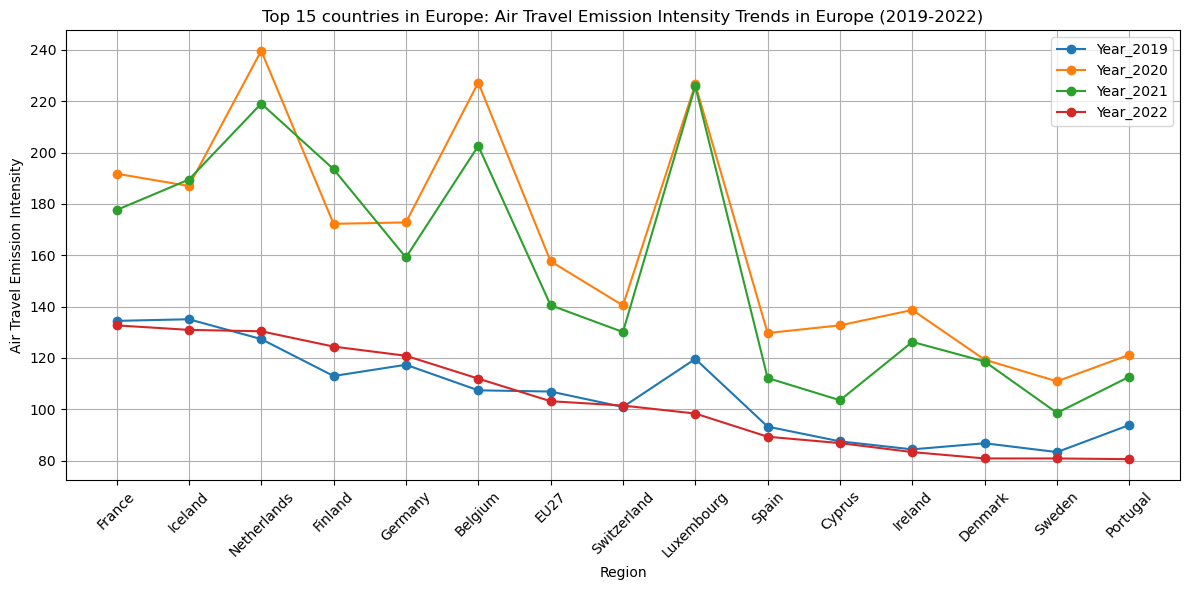

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Rename columns for better readability
europe_df_renamed = europe_df.rename(columns={2019: 'Year_2019', 2020: 'Year_2020', 2021: 'Year_2021', 2022: 'Year_2022'})

# Sort and get the top 15 regions for the year 2022, ensuring no duplicate regions
top_15_europe_2022 = europe_df_renamed.sort_values(by='Year_2022', ascending=False).drop_duplicates(subset='NAME_HTML').head(15)

# Reset the index to add 'Sr No.'
top_15_europe_2022.reset_index(drop=True, inplace=True)
top_15_europe_2022.index += 1
top_15_europe_2022.index.name = 'Sr No.'

# Select relevant columns
top_15_europe_2022_table = top_15_europe_2022[['NAME_HTML', 'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022']]

# Display the result with proper column names
print(top_15_europe_2022_table)

# Plotting the line chart
plt.figure(figsize=(12, 6))

years = ['Year_2019', 'Year_2020', 'Year_2021', 'Year_2022']
for year in years:
    plt.plot(top_15_europe_2022['NAME_HTML'], top_15_europe_2022[year], marker='o', label=year)

plt.xlabel('Region')
plt.ylabel('Air Travel Emission Intensity')
plt.title('Top 15 countries in Europe: Air Travel Emission Intensity Trends in Europe (2019-2022)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


                              ISO_NAME      2013      2014      2015      2016
Sr No.                                                                        
1                 Cayman Islands (the)  0.135772  1.413773  1.470577  1.492858
2                                Libya  0.434368  0.542587  0.620925  1.148063
3                         Turkmenistan  0.989662  0.911020  0.944634  0.894799
4                  Trinidad and Tobago  0.891081  0.891197  0.891526  0.865700
5       Turks and Caicos Islands (the)  0.229535  0.769962  0.800919  0.813056
6                              Ukraine  0.805269  0.757588  0.676779  0.713211
7               Bosnia and Herzegovina  0.661134  0.659195  0.666365  0.653286
8                              Estonia  0.680717  0.611062  0.628295  0.613765
9                               Guyana  0.591522  0.578920  0.590708  0.579868
10                        South Africa  0.602786  0.607443  0.576310  0.570157
11                          Uzbekistan  0.693837  0.

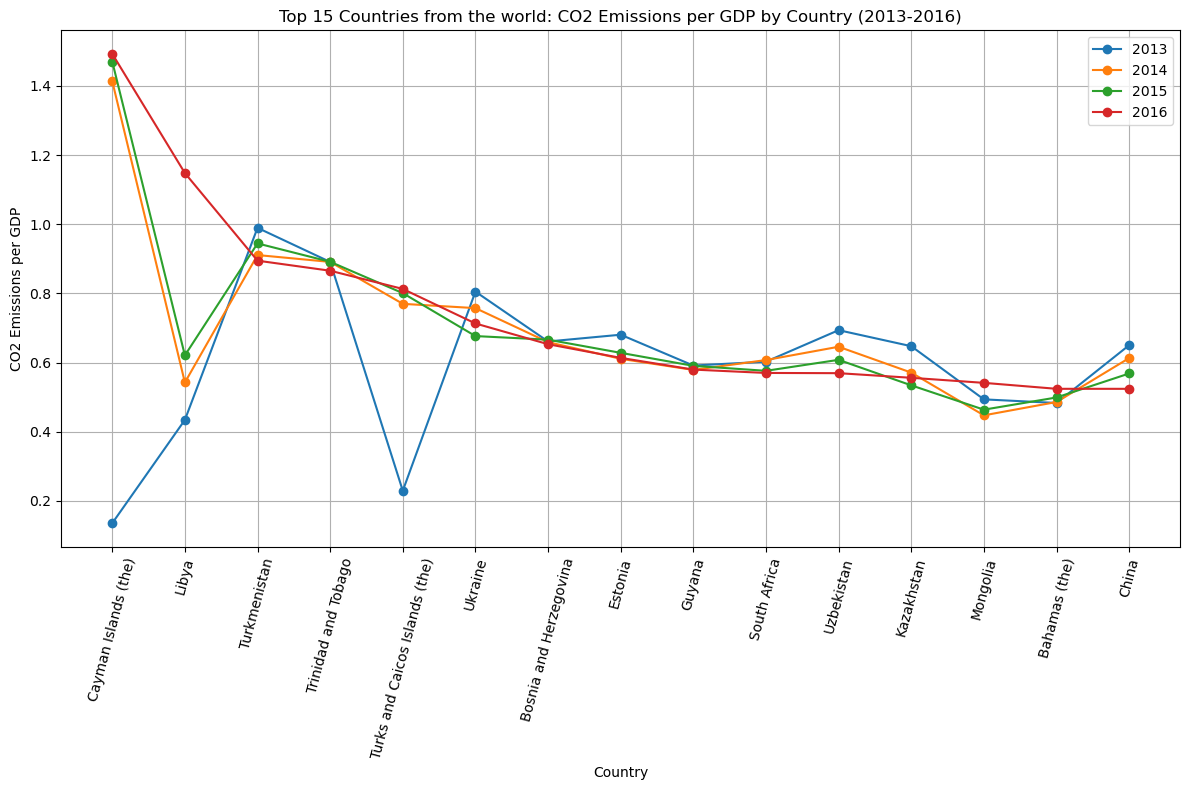

In [43]:
import matplotlib.pyplot as plt

# Assuming `world_df` contains the cleaned data for CO2 emissions per GDP

# Filter out countries with values above 300 for any year
world_df_filtered = world_df[(world_df['2013'] <= 300) & 
                             (world_df['2014'] <= 300) & 
                             (world_df['2015'] <= 300) & 
                             (world_df['2016'] <= 300)]

# Sort and get the top 15 countries for the year 2016
top_15_world_2016 = world_df_filtered.sort_values(by='2016', ascending=False).head(15)

top_15_world_2016.reset_index(drop=True, inplace=True)
top_15_world_2016.index += 1
top_15_world_2016.index.name = 'Sr No.'


# Print the data table for the top 15 countries
print(top_15_world_2016[['ISO_NAME', '2013', '2014', '2015', '2016']])

# Plotting the line graph
x = range(len(top_15_world_2016['ISO_NAME']))

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting lines for each year
ax.plot(x, top_15_world_2016['2013'], marker='o', label='2013')
ax.plot(x, top_15_world_2016['2014'], marker='o', label='2014')
ax.plot(x, top_15_world_2016['2015'], marker='o', label='2015')
ax.plot(x, top_15_world_2016['2016'], marker='o', label='2016')

ax.set_xlabel('Country')
ax.set_ylabel('CO2 Emissions per GDP')
ax.set_title('Top 15 Countries from the world: CO2 Emissions per GDP by Country (2013-2016)')
ax.set_xticks(x)
ax.set_xticklabels(top_15_world_2016['ISO_NAME'], rotation=75)
ax.legend()

fig.tight_layout()
plt.grid(True)
plt.show()
